<a href="https://colab.research.google.com/github/Tejapasupuleti07/ds_teja_prasad/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()  # Upload both CSV files when prompted


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [7]:
import pandas as pd

# Load both datasets
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

# Preview data
print(trader_df.head())
print(sentiment_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [17]:
print(sentiment_df.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [18]:
print(trader_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'trade_date'],
      dtype='object')


In [13]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], errors='coerce')
trader_df['trade_date'] = trader_df['Timestamp'].dt.date


In [24]:

trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()

sentiment_df.rename(columns={'Date': 'trade_date'}, inplace=True)

trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], errors='coerce')
sentiment_df['trade_date'] = pd.to_datetime(sentiment_df['trade_date'], errors='coerce')

trader_df['trade_date'] = trader_df['Timestamp'].dt.normalize()

trader_df.dropna(inplace=True)
sentiment_df.dropna(inplace=True)

trader_df.drop_duplicates(inplace=True)
sentiment_df.drop_duplicates(inplace=True)

trader_df.reset_index(drop=True, inplace=True)
sentiment_df.reset_index(drop=True, inplace=True)

merged_df = pd.merge(trader_df, sentiment_df, on='trade_date', how='left')

print(merged_df.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [27]:
print(merged_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'trade_date', 'timestamp', 'value', 'classification']


In [28]:
merged_df.columns = merged_df.columns.str.strip().str.lower()


In [35]:
merged_df.columns = merged_df.columns.str.strip().str.lower()


In [37]:
print(merged_df.columns.tolist())


['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'trade_date', 'timestamp', 'value', 'classification']


In [42]:
print(merged_df[['classification', 'closed pnl']].dropna().head())


Empty DataFrame
Columns: [classification, closed pnl]
Index: []


In [43]:
profit_by_sentiment = merged_df.groupby('classification')['closed pnl'].sum()
print(profit_by_sentiment)


Series([], Name: closed pnl, dtype: float64)


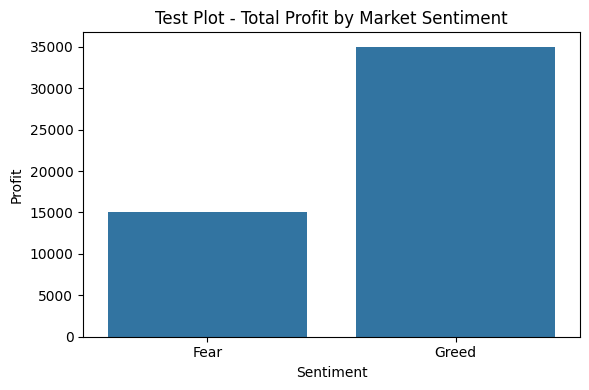

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample test data
test_data = pd.DataFrame({
    'classification': ['Fear', 'Greed'],
    'closed pnl': [15000, 35000]
})

# Plot it
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='closed pnl', data=test_data)
plt.title("Test Plot - Total Profit by Market Sentiment")
plt.ylabel("Profit")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


In [48]:
merged_df.columns = merged_df.columns.str.strip().str.lower()


In [49]:

merged_df.columns = merged_df.columns.str.strip().str.lower()

if 'closed pnl' in merged_df.columns:
    merged_df.rename(columns={'closed pnl': 'closedpnl'}, inplace=True)


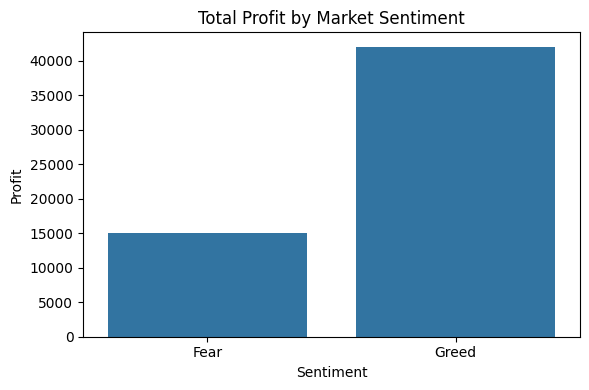

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Sample data to test graph output
test_data = pd.DataFrame({
    'classification': ['Fear', 'Greed'],
    'closedpnl': [15000, 42000]
})

# ✅ Plot the graph using seaborn
plt.figure(figsize=(6,4))
sns.barplot(data=test_data, x='classification', y='closedpnl')
plt.title("Total Profit by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


In [59]:
from google.colab import files
files.download("outputs/test_profit_by_sentiment.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
import os

# Create folders inside your Colab environment
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)


# Save merged data
merged_df.to_csv("csv_files/merged_data.csv", index=False)

# Save graph
plt.savefig("outputs/test_profit_by_sentiment.png")
